# Chapter 8: Practice Exercises with Solutions
---

**Exercise 1:** The following regression output is for predicting the tail length (`length`, in centimeters) of kangaroos using their body weight (`weight`, in kilograms). The coefficients are estimated using a dataset of 200 kangaroos.

| . | Estimate | Std. Error   |
|------|------|------|
|  (Intercept)  | -0.437   | 0.552   |
|   weight  | 5.034    | 0.340|
|   R-squared = 64.6%  |      |

(A) Write out the linear model.

(B) Interpret the intercept.

(C) Interpret the slope.

(D) Interpret the R-squared value.

(E) Calculate the correlation coefficient.

**Answers:**

(A) $\hat{length}$ = -0.437 + 5.034 x $weight$

(B) Expected tail length of kangaroos with 0 body weight is -0.437. This is obviously not a meaningful
value, it just serves to adjust the height of the regression line.

(C) For each additional kilogram in kangaroos' weights, we expect their tails to be longer by 5.034
centimeters, on average.

(D) Body weight explains 64.6% of the variability in lengths of kangaroos' tails.

(E) $\sqrt{0.646} = 0.8037$

---
**Exercise 2**: Many people believe that gender, weight, drinking habits, and many other factors are much more important in predicting blood alcohol content (BAC) than simply considering the number of drinks a person consumed. Here we examine data from sixteen student volunteers at Ohio State University who each drank a randomly assigned number of cans of beer. These students were evenly divided between men and women, and they differed in weight and drinking habits. Thirty minutes later, a police officer measured their blood alcohol content (BAC) in grams of alcohol per deciliter of blood. The regression table summarize the findings.

| . | Estimate | Std. Error   | t value   | p-value  |
|------|------|------|------|------|
|  (Intercept)  | -0.0127   | 0.0126  | -1.00  | 0.3320  |
|   beers  | 0.0180    | 0.0024| 7.48| 0.0000|  

(A) Write out the linear model.

(B) Interpret the intercept.

(C) Interpret the slope.

(D) Do the data provide strong evidence that drinking more cans of beer is associated with an increase in blood alcohol? State the null and alternative hypotheses, report the p-value, and state your conclusion.

(E) The correlation coefficient for number of cans of beer and BAC is 0.89. Calculate ${R^2}$ and interpret it in
context.

**Answers:**

(A) $\hat{BAC}$ = -0.0127 + 0.0180 x ${beers}$

(B) Students who don't have any beer are expected to have a blood alcohol content of -0.0127. This is obviously not a meaningful value, it just serves to adjust the height of the regression line.

(C) For each additional can of beer consumed, the model predicts an additional 0.0180 grams per deciliter BAC.

(D) The hypotheses are as follows:

$H_0$: The true slope coefficient of number of beers is zero ($\beta_1 = 0$).

$H_a$: The true slope coefficient of number of beers is different than zero ($\beta_1 \neq 0$).

The p-value is approximately 0. With such a small p-value and since the data showed a positive relationship, we reject $H_0$ and conclude that the data provide convincing evidence that number of cans of beer consumed and blood alcohol content are positively correlated and the true slope parameter is greater than 0.

(E) $R^2 = 0.89^2 = 0.79$

Approximately 79% of the variability in blood alcohol content can be explained by number of cans of beer consumed.

---
## Baseball Player Statistics (MLB11)

The movie [Moneyball](https://www.imdb.com/title/tt1210166/) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that under-used statistics, such as a player's ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these under-used statistics turned out to be much more affordable for the team.

Data Source: https://www.mlb.com/

The data set is available as a CSV file named `mlb11.csv` (Download from [here](https://raw.githubusercontent.com/imranture/practice_stats/main/datasets/mlb11.csv)).

In [1]:
import pandas as pd

mlb11 = pd.read_csv('datasets/mlb11.csv')
print(f'Data shape = {mlb11.shape}')
mlb11.head()

Data shape = (30, 12)


,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


---
**Exercise 3:** Compute the correlation of `runs` (number of runs) and `bat_avg` (batting average, which is the number of hits divided by at bats).

**Hint**: Use [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) function.

In [2]:
print(f"Correlation = {mlb11['runs'].corr(mlb11['bat_avg']):.4f}")

Correlation = 0.8100


---
**Exercise 4:** Construct a simple linear model for `runs` as dependent variable and `bat_avg` as the independent variable. Find the slope, intercept, and R-squared values.

**Hint**: Use [`statsmodels`](https://www.statsmodels.org/stable/regression.html) to fit the linear model.

In [3]:
import statsmodels.api as sm

# if you want to exclude the intercept, add "-1" to the formula:
# that is, "runs ~ bat_avg - 1"
formula_string = 'runs ~ bat_avg'

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     53.41
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           5.88e-08
Time:                        17:21:05   Log-Likelihood:                -158.43
No. Observations:                  30   AIC:                             320.9
Df Residuals:                      28   BIC:                             323.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -642.8189    183.080     -3.511      0.0

In [4]:
print(f'Intercept = {model_fitted.params[0]:.4f}')
print(f'Slope = {model_fitted.params[1]:.4f}')
print(f'R-squared = {model_fitted.rsquared:.4f}')

Intercept = -642.8189
Slope = 5242.2291
R-squared = 0.6561


/var/folders/6k/hgb80htj4jjctgq4scyrwwzm0000gn/T/ipykernel_99326/2421614329.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Intercept = {model_fitted.params[0]:.4f}')
/var/folders/6k/hgb80htj4jjctgq4scyrwwzm0000gn/T/ipykernel_99326/2421614329.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Slope = {model_fitted.params[1]:.4f}')


---
**Exercise 5:** Summarize the relationship between these two variables by finding the line that best describes their relationship. In other words, plot `bat_avg` vs. `runs`, both actual `runs` (as a scatter plot) and predicted `runs` (as a line plot).

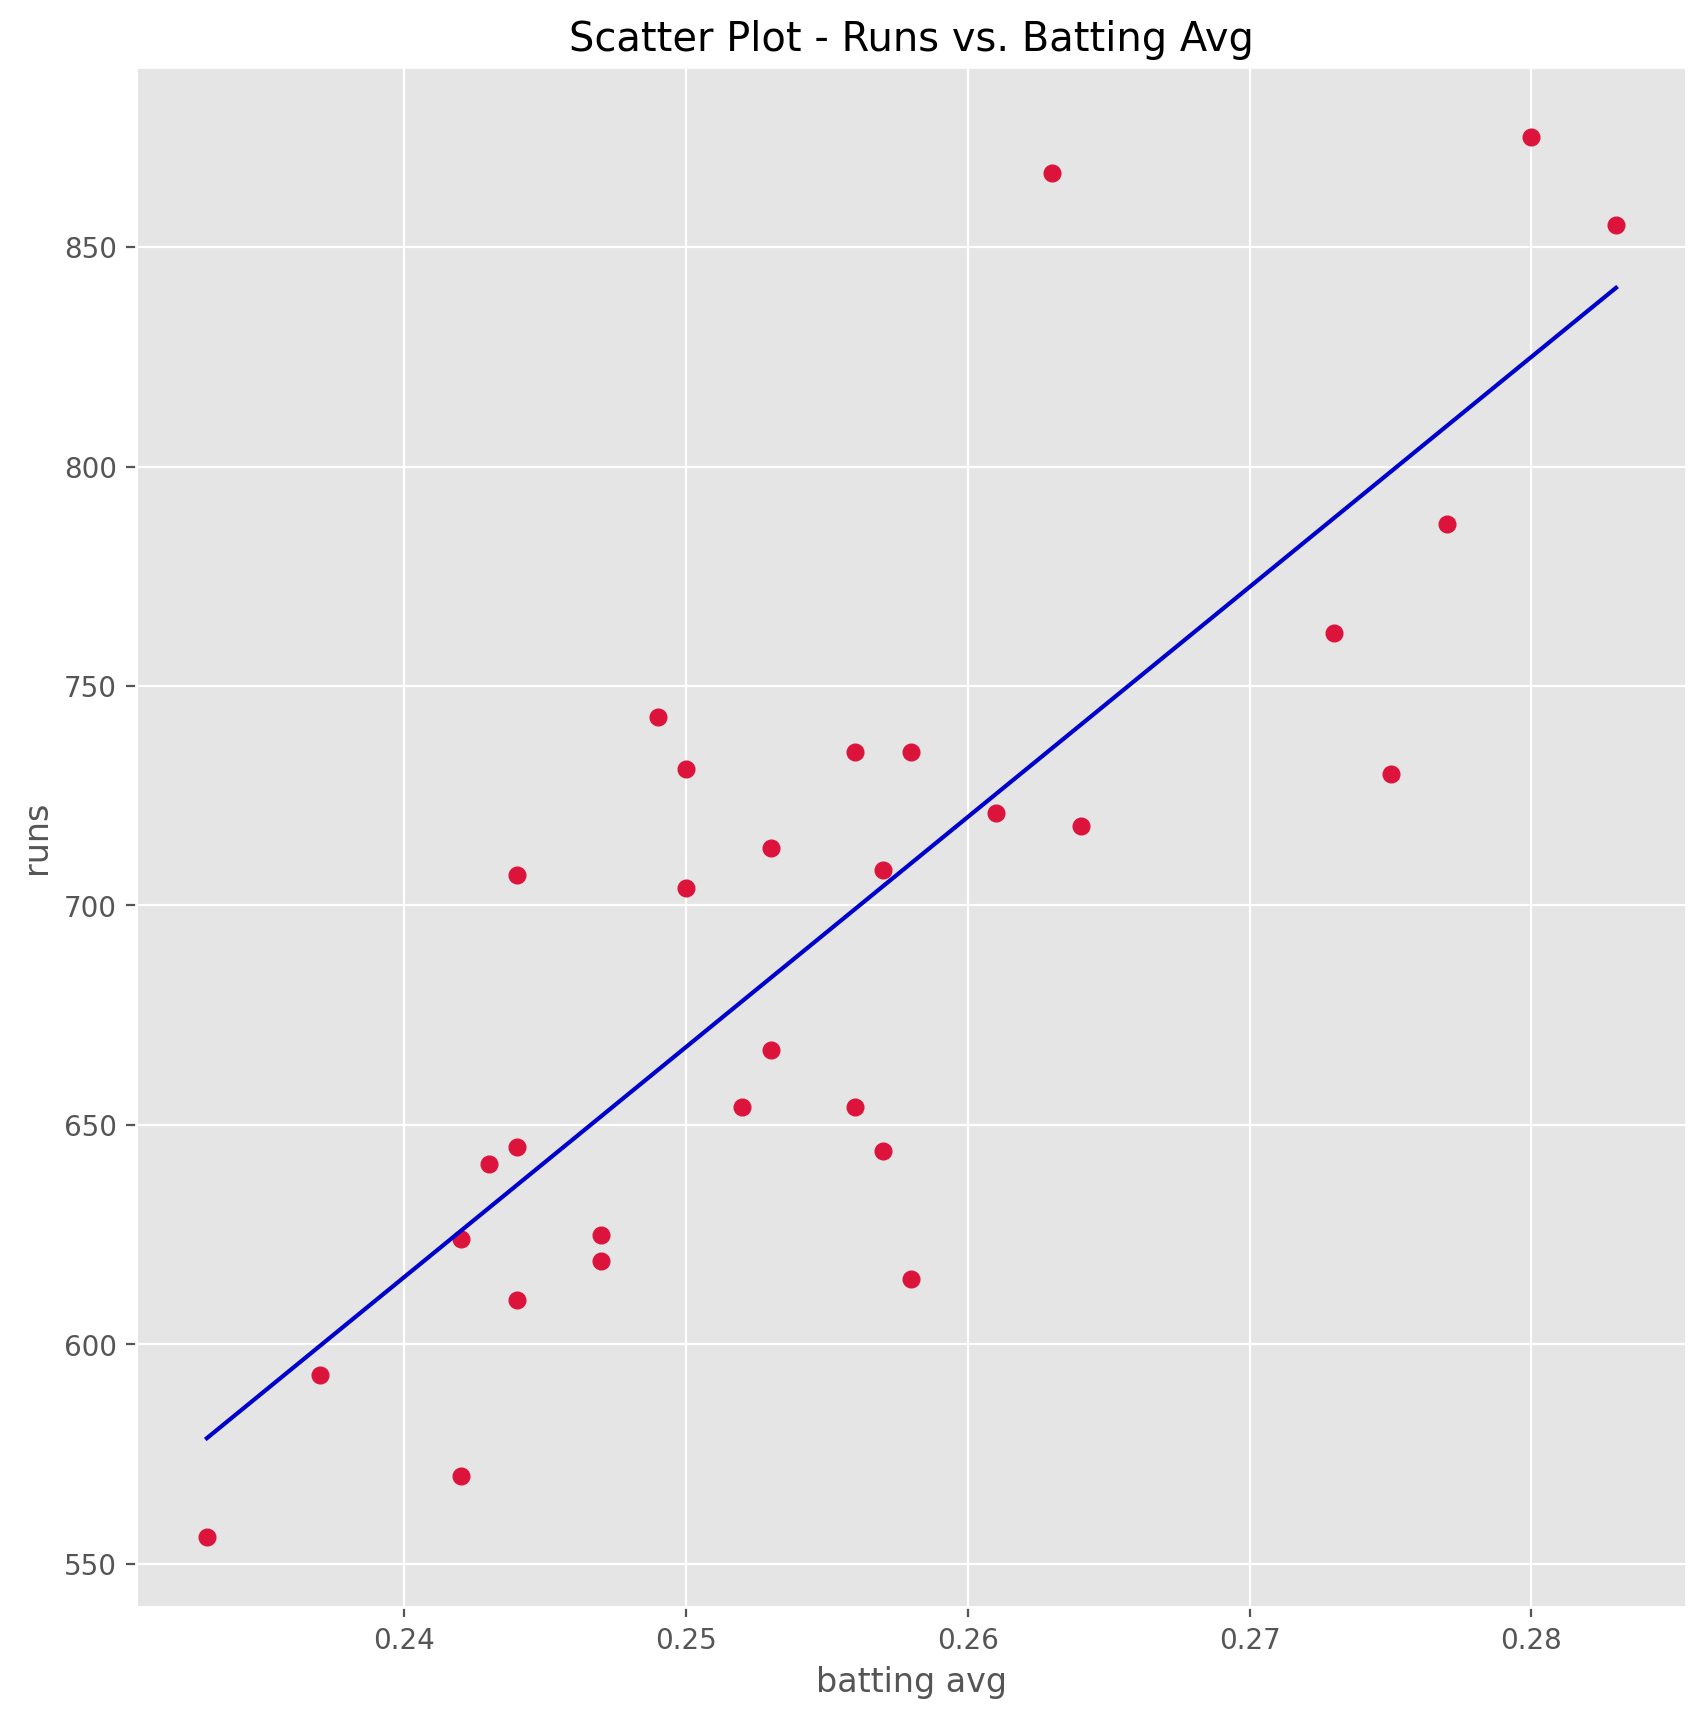

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,10)

x = mlb11['bat_avg']
y = mlb11['runs']

y_pred = model_fitted.predict(x)

plt.scatter(x, y, color = 'crimson')
plt.plot(x, y_pred, color = 'mediumblue')
plt.title('Scatter Plot - Runs vs. Batting Avg')
plt.xlabel('batting avg')
plt.ylabel('runs')
plt.show();